In [354]:
#Import the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [355]:
#Load the dataset and print the data information:
dataframe = pd.read_csv('/Users/manvendrasharma/Downloads/dataset_assignment1.csv')
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB
None


In [356]:
# Print-out the number of samples for each class in the dataset:
print(dataframe.groupby('class').size())

class
0    459
1    241
dtype: int64


In [357]:
class_counts = dataframe['class'].value_counts()
print(class_counts)

0    459
1    241
Name: class, dtype: int64


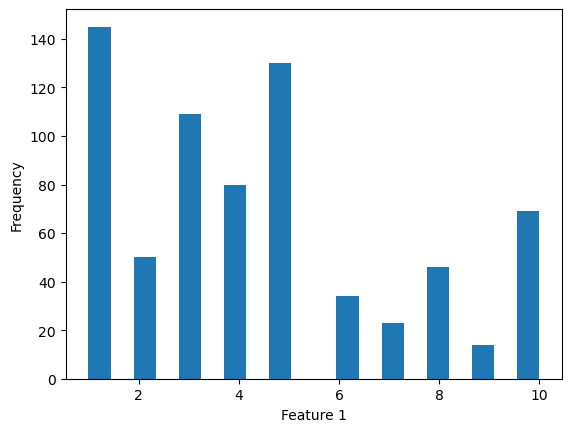

In [358]:
#Plot some figures to visualize the dataset (e.g., histogram, etc.)
plt.hist(dataframe['feature1'], bins=20)
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.show()

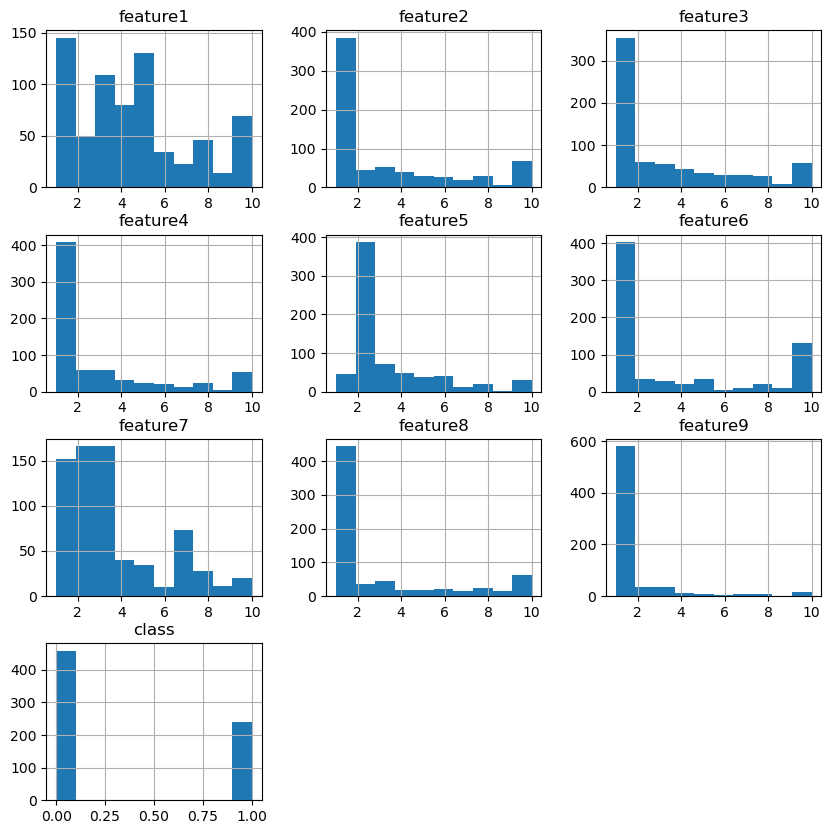

In [359]:

#The first visualization shows a histogram for each feature in the dataset:
dataframe.hist(figsize=(10,10))
plt.show()

In [360]:
import seaborn as sns

<AxesSubplot:>

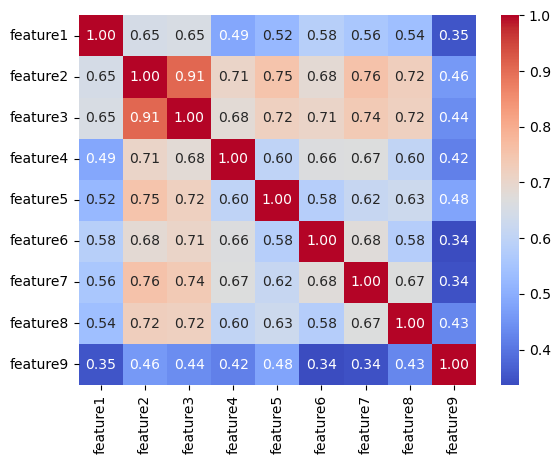

In [361]:
#The second visualization shows a heatmap of the correlation between features in the dataset:
corr_matrix = np.corrcoef(dataframe.iloc[:, :-1].T)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', xticklabels=dataframe.columns[:-1], yticklabels=dataframe.columns[:-1])

In [362]:
#For each class, print-out the statistical description of features (e.g., the input variable x), such as mean, std, max and min values, etc
class_stats = dataframe.groupby('class').describe()
print(class_stats)

      feature1                                                feature2  \
         count      mean       std  min  25%  50%   75%   max    count   
class                                                                    
0        459.0  2.956427  1.672490  1.0  1.0  3.0   4.0   8.0    459.0   
1        241.0  7.195021  2.428849  1.0  5.0  8.0  10.0  10.0    241.0   

                 ... feature8       feature9                                \
           mean  ...      75%   max    count      mean       std  min  25%   
class            ...                                                         
0      1.324619  ...      1.0   9.0    459.0  1.063181  0.501456  1.0  1.0   
1      6.572614  ...     10.0  10.0    241.0  2.589212  2.557939  1.0  1.0   

                       
       50%  75%   max  
class                  
0      1.0  1.0   8.0  
1      1.0  3.0  10.0  

[2 rows x 72 columns]


In [363]:
#Split data into a training dataset and a testing dataset (i.e., 80% v.s. 20%)
X = dataframe.drop('class', axis=1)
Y=dataframe['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [364]:
X_train.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
82,5,2,1,1,2,1,3,1,1
51,5,3,3,4,2,4,3,4,1
220,1,1,1,2,2,1,3,1,1
669,5,10,10,8,5,5,7,10,1
545,5,1,1,1,2,1,2,1,1


In [365]:
Y_train.head()

82     0
51     1
220    0
669    1
545    0
Name: class, dtype: int64

In [366]:
#Train and test the Logistic Regression model:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train,Y_train)

y_predicted=log_reg.predict(X_test)


In [367]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [368]:
#Predict the X_test
model.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0])

In [369]:
#Predict the score
model.score(X_test,Y_test)

0.9642857142857143

In [370]:
# Calculate evaluation metrics
confusion_mat=confusion_matrix(Y_test, y_predicted)
precision=precision_score(Y_test,y_predicted,average='weighted')
recall = recall_score(Y_test, y_predicted, average='weighted')
f1=f1_score(Y_test,y_predicted,average='weighted')
accuracy=accuracy_score(Y_test,y_predicted)

In [389]:
# Print evaluation metrics
print('Confusion Matrix:')
print(confusion_mat)


print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('f1: {:.3f}'.format(f1))
print('Accuracy: {:.3f}'.format(accuracy))



Confusion Matrix:
[[93  1]
 [ 4 42]]
Precision: 0.965
Recall: 0.964
f1: 0.964
Accuracy: 0.964


In [390]:
from sklearn.metrics import classification_report, confusion_matrix

In [373]:
#summarize the evaluation results of the logistic regression model by creating classification report, confusion matrix and printing them
Report = classification_report(Y_test, y_predicted)
Matrix=confusion_matrix(Y_test,y_predicted)
print(Report)
print(Matrix)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        94
           1       0.98      0.91      0.94        46

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140

[[93  1]
 [ 4 42]]


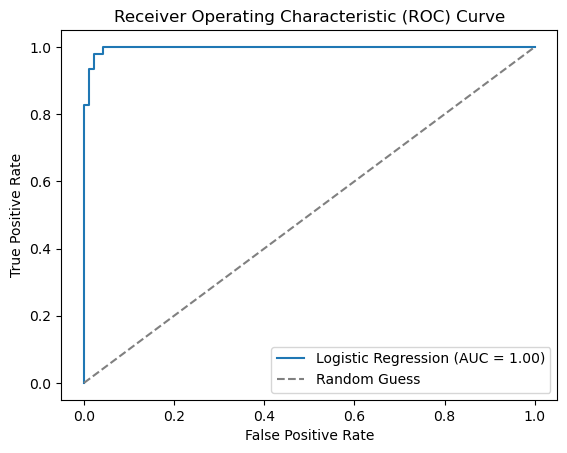

In [374]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predict probabilities for test data
probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test, probs)
auc_score = roc_auc_score(Y_test, probs)

# Plot ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

RandomForest Algorithm

In [375]:
## Step 2: Load the dataset and split into training and testing datasets
dataframe = pd.read_csv('/Users/manvendrasharma/Downloads/dataset_assignment1 (1).csv')
X = dataframe.iloc[:, :-1].values
Y = dataframe.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [376]:
from sklearn.ensemble import RandomForestClassifier

In [377]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
rfc = RandomForestClassifier(random_state=42)

In [378]:
#Define the hyperparameters to tune
params = {
    'n_estimators': [50],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    
}

In [379]:
# Perform grid search with 5-fold cross-validation
grid = GridSearchCV(rfc, params, cv=5, n_jobs=-1)
grid.fit(X_train, Y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best score: 0.9767857142857143


In [380]:
print("Accuracy:", accuracy_score(Y_test, y_predicted))
print("Precision:", precision_score(Y_test, y_predicted, average='weighted'))
print("Recall:", recall_score(Y_test, y_predicted, average='weighted'))
print("F1-Score:", f1_score(Y_test, y_predicted, average='weighted'))
# create the confusion matrix
cm = confusion_matrix(Y_test, y_predicted)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.5928571428571429
Precision: 0.5783710655204302
Recall: 0.5928571428571429
F1-Score: 0.582008257080084
Confusion Matrix:
[[63 23]
 [34 20]]


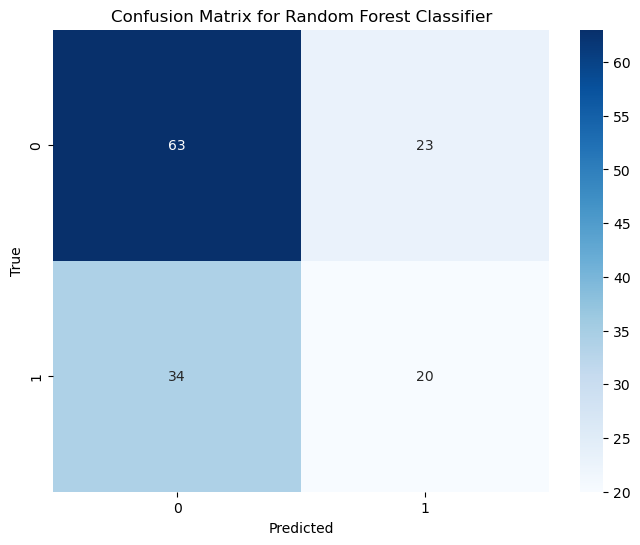

In [381]:
# plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

/Users/manvendrasharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


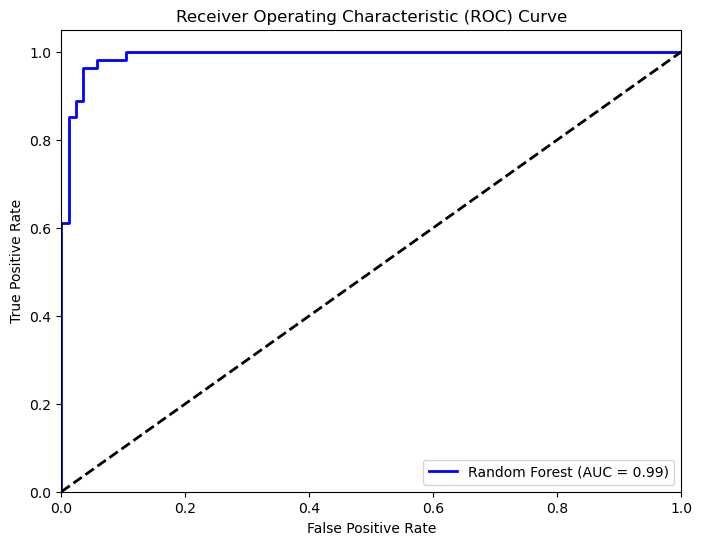

In [382]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve and AUC score 
y_predicted_prob = model.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_predicted_prob[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Support Vector Machine Algorithm

In [383]:
from sklearn.svm import SVC

In [384]:
svm = SVC()

# fit the classifier to the training data
svm.fit(X_train, Y_train)

SVC()

In [385]:
y_predicted = svm.predict(X_test)

In [386]:
from sklearn.model_selection import GridSearchCV

# define the hyperparameters to tune
parameters = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1,1,10], 'gamma': [0.1, 1, 10]}

# create an instance of the SVM classifier
svm = SVC()

# create an instance of the GridSearchCV to perform K-Fold Cross Validation
clf = GridSearchCV(svm, parameters, cv=4)

# fit the GridSearchCV to the training data
clf.fit(X_train, Y_train)

# get the best hyperparameters and model from the GridSearchCV
best_params = clf.best_params_
best_model = clf.best_estimator_

# predict the target values for the test data using the best model
y_predicted = best_model.predict(X_test)


Accuracy:  0.9642857142857143
Precision:  0.9646710278453265
Recall:  0.9642857142857143
F1-Score:  0.9639642668056104


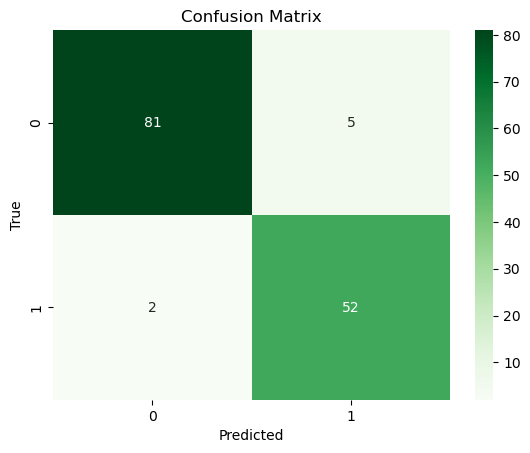

In [387]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

# plot confusion matrix
conf_mat = confusion_matrix(Y_test, y_predicted)
sns.heatmap(conf_mat, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()